In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
life_exp = pd.read_csv('all_data.csv')
life_exp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [41]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [42]:
life_exp['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [43]:
life_exp.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


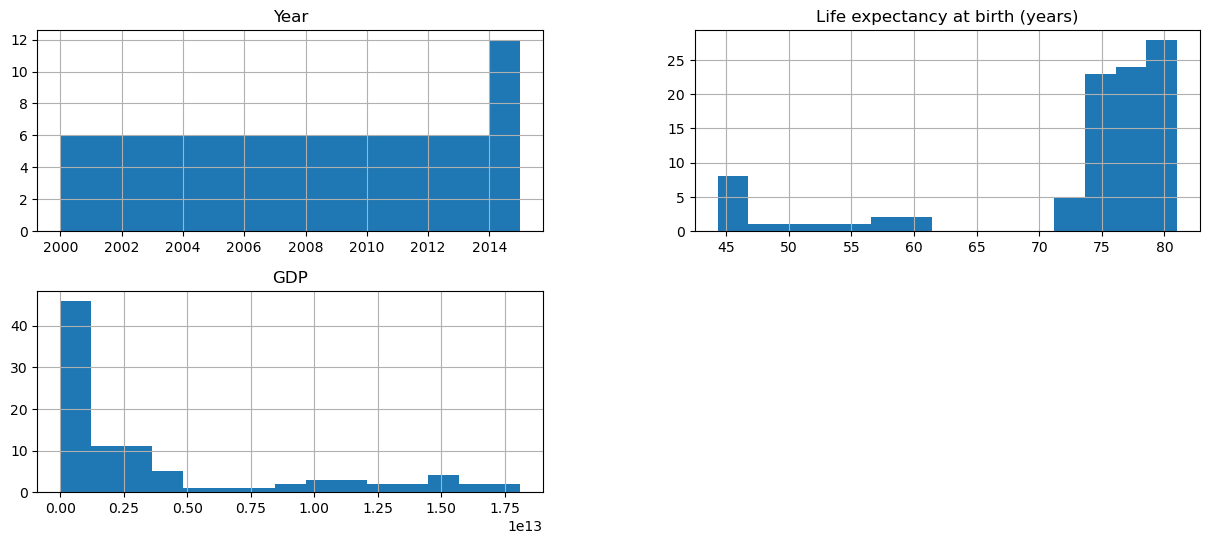

In [44]:
numerical_features = ['Year', 'Life expectancy at birth (years)', 'GDP']
life_exp[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

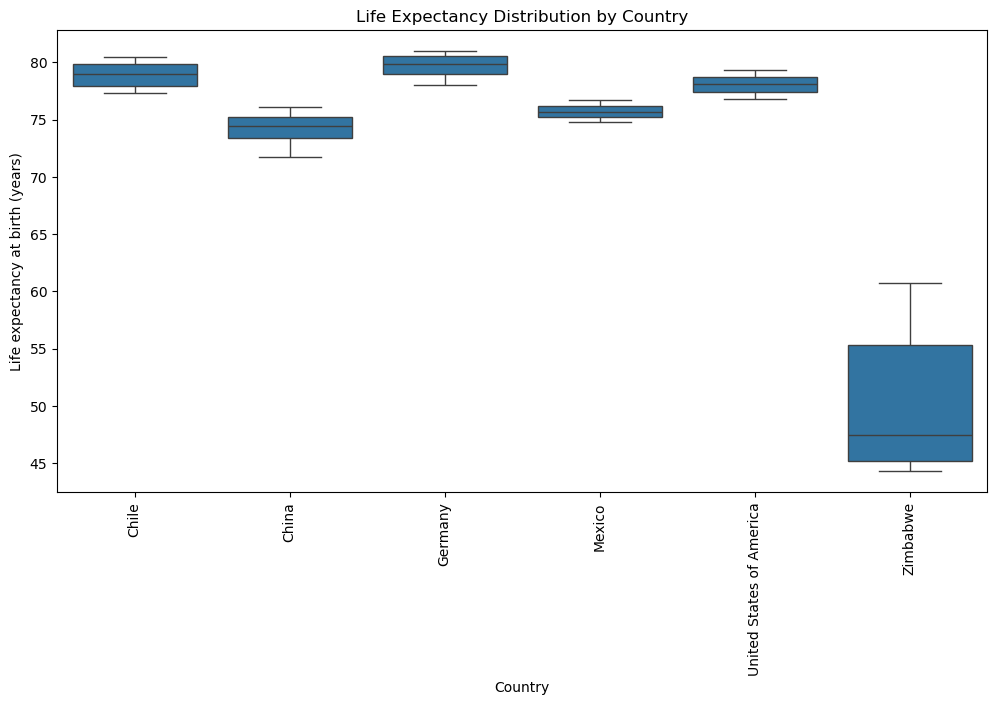

In [45]:
# Box plot to compare life expectancy across countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=life_exp, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many categories
plt.title('Life Expectancy Distribution by Country')
plt.show()

In [46]:
# Summary table of Life Expectancy and GDP by Country
summary_table = life_exp.groupby('Country')[['Life expectancy at birth (years)', 'GDP']].agg(['mean', 'median', 'std'])
print(summary_table)

                         Life expectancy at birth (years)                   \
                                                     mean median       std   
Country                                                                      
Chile                                            78.94375  79.00  1.058911   
China                                            74.26250  74.45  1.318016   
Germany                                          79.65625  79.85  0.975000   
Mexico                                           75.71875  75.65  0.620987   
United States of America                         78.06250  78.15  0.832566   
Zimbabwe                                         50.09375  47.40  5.940311   

                                   GDP                              
                                  mean        median           std  
Country                                                             
Chile                     1.697888e+11  1.729975e+11  7.687884e+10  
China                

### GDP STATS

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64
Skewness: 1.4103532048974716
Kurtosis: 0.6344576925784486


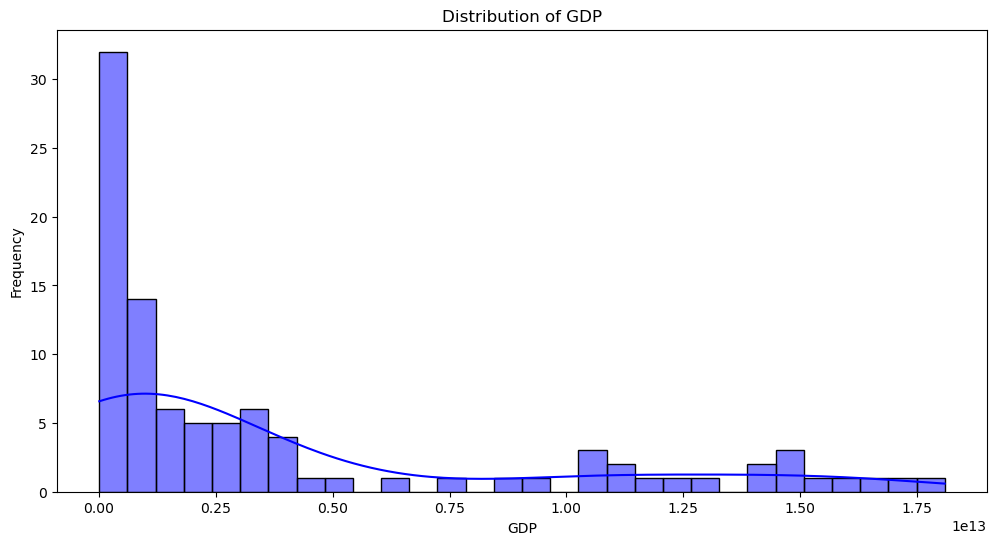

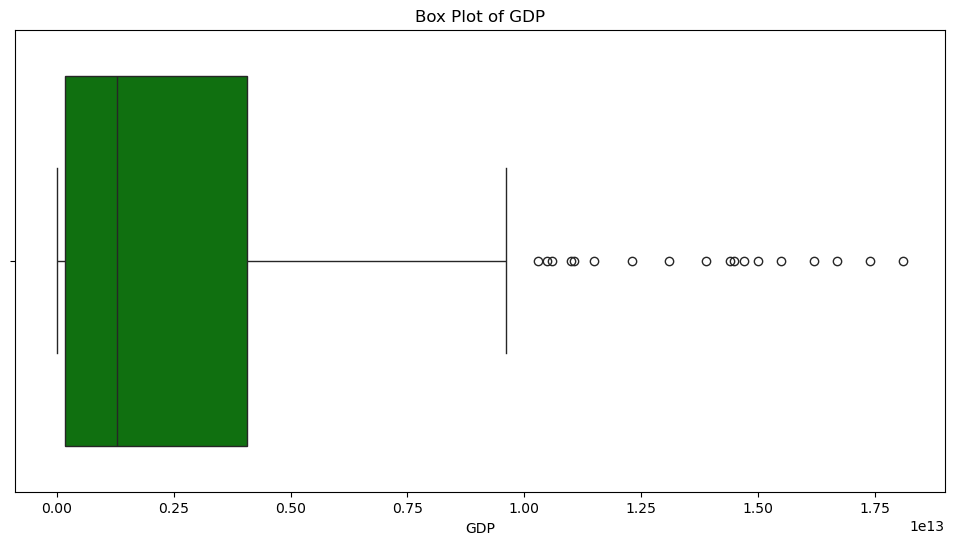

In [47]:
# Summary statistics for GDP
gdp_summary = life_exp['GDP'].describe()
print(gdp_summary)

# Additional statistics for GDP
gdp_skewness = life_exp['GDP'].skew()
gdp_kurtosis = life_exp['GDP'].kurtosis()

print(f'Skewness: {gdp_skewness}')
print(f'Kurtosis: {gdp_kurtosis}')


# Histogram to show GDP distribution
plt.figure(figsize=(12, 6))
sns.histplot(life_exp['GDP'], kde=True, bins=30, color='blue')
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

# Box plot to show the spread of GDP and detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=life_exp['GDP'], color='green')
plt.title('Box Plot of GDP')
plt.xlabel('GDP')
plt.show()



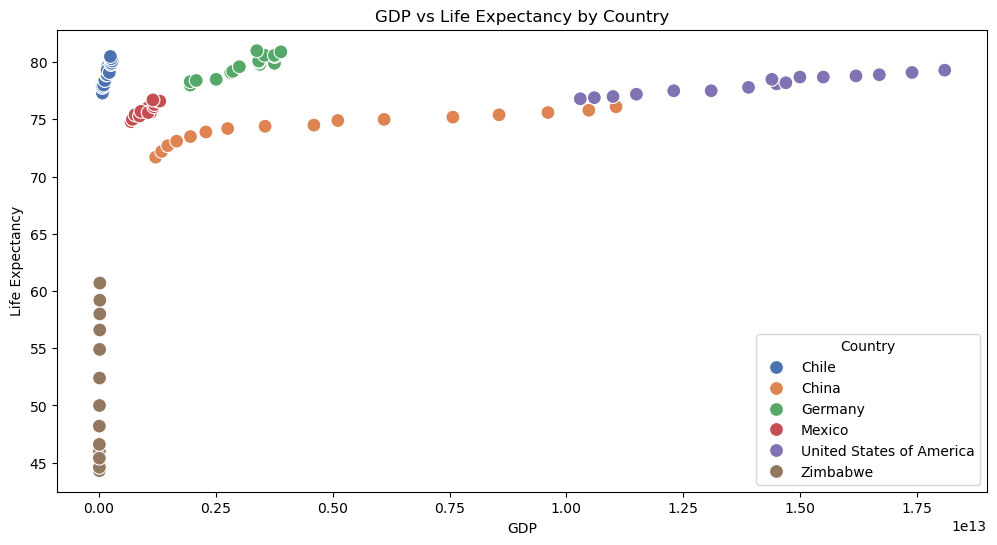

In [53]:
#lets see the relation between gdp and the country using scatter plot
# Scatter plot to compare GDP and Life Expectancy
plt.figure(figsize=(12, 6))
sns.scatterplot(data=life_exp, x='GDP', y='Life expectancy at birth (years)', hue='Country', palette='deep', s=100)
plt.title('GDP vs Life Expectancy by Country')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()



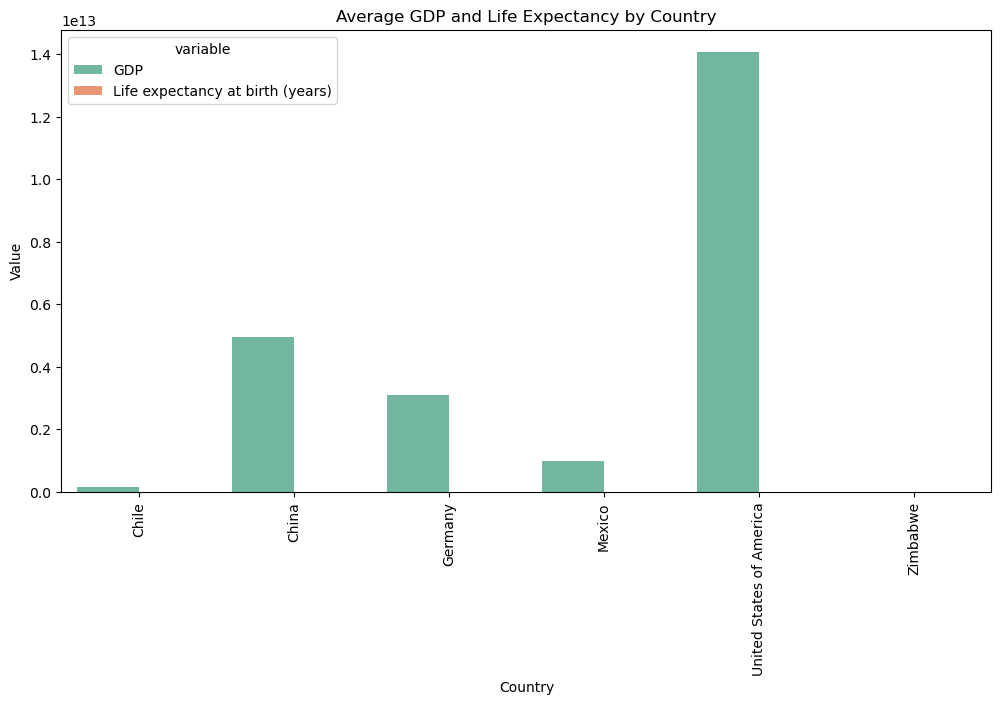

In [54]:
# Grouped bar plot to show average GDP and Life Expectancy by country
gdp_life_exp = life_exp.groupby('Country')[['GDP', 'Life expectancy at birth (years)']].mean().reset_index()

gdp_life_exp_melted = gdp_life_exp.melt(id_vars='Country', value_vars=['GDP', 'Life expectancy at birth (years)'])

plt.figure(figsize=(12, 6))
sns.barplot(data=gdp_life_exp_melted, x='Country', y='value', hue='variable', palette='Set2')
plt.xticks(rotation=90)
plt.title('Average GDP and Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Value')
plt.show()


## life Expectancy Stats

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64
Skewness: -1.8449349568541278
Kurtosis: 1.9396466131166679


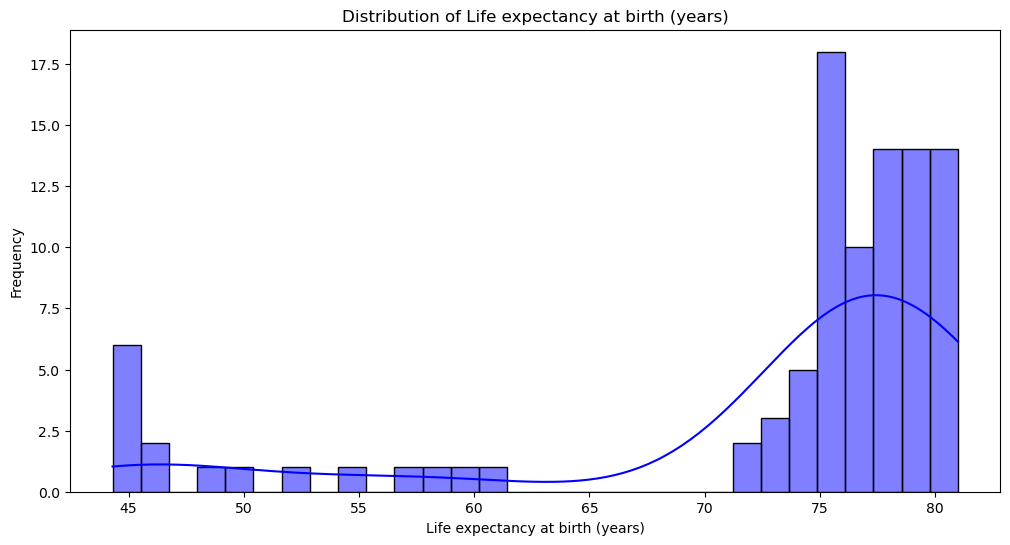

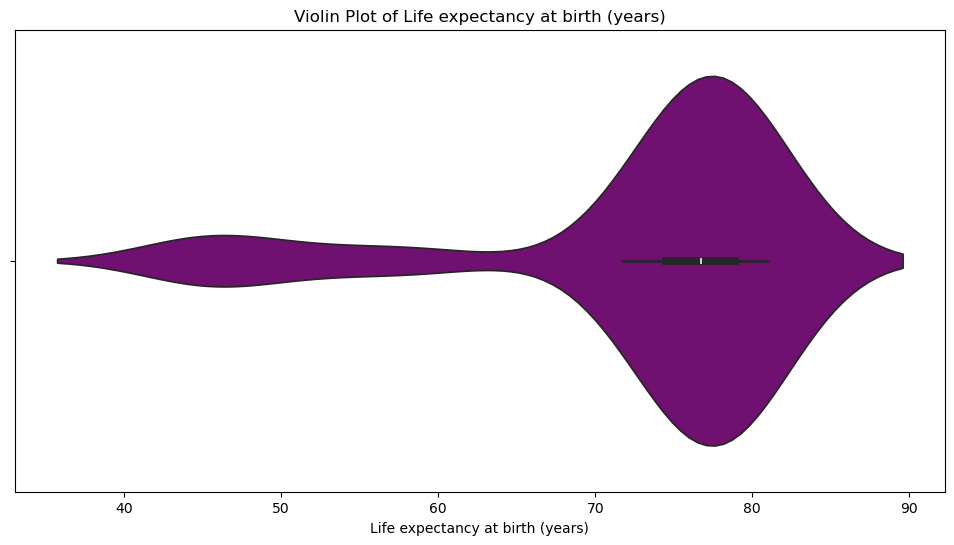

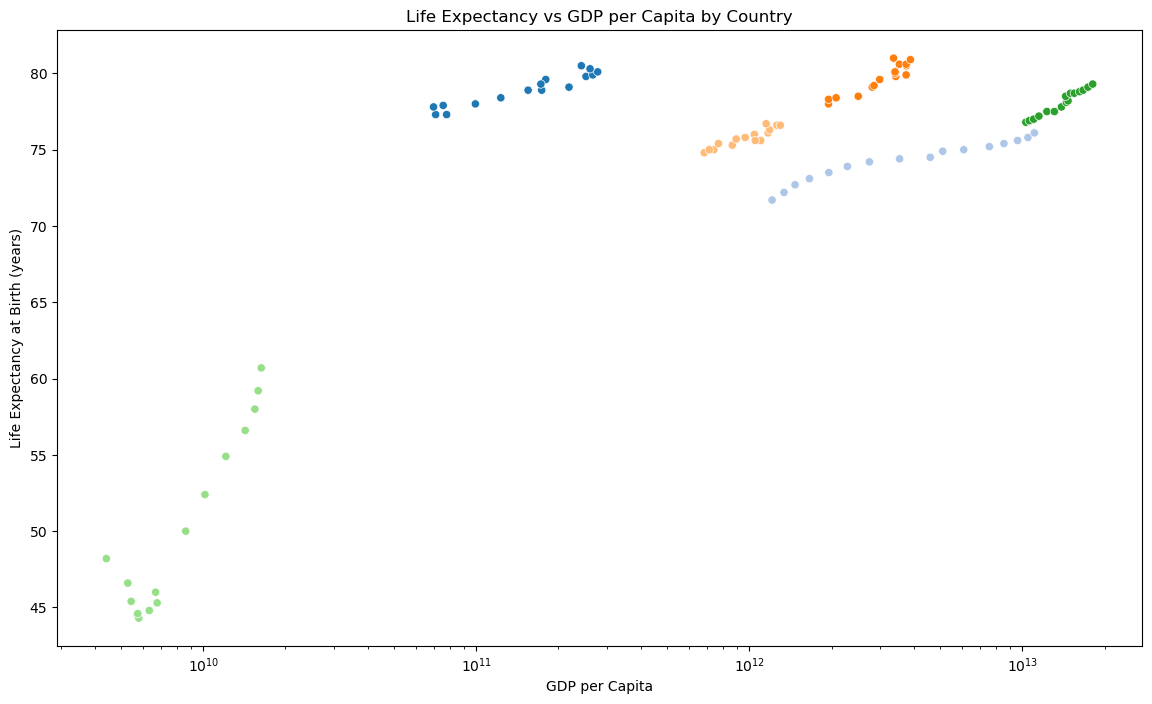

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for Life Expectancy
lifeexp_summary = life_exp['Life expectancy at birth (years)'].describe()
print(lifeexp_summary)

# Additional statistics for Life Expectancy
lifeexp_skewness = life_exp['Life expectancy at birth (years)'].skew()
lifeexp_kurtosis = life_exp['Life expectancy at birth (years)'].kurtosis()

print(f'Skewness: {lifeexp_skewness}')
print(f'Kurtosis: {lifeexp_kurtosis}')

# Histogram to show Life Expectancy distribution
plt.figure(figsize=(12, 6))
sns.histplot(life_exp['Life expectancy at birth (years)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Life expectancy at birth (years)')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Frequency')
plt.show()

# Violin plot to show the distribution of Life Expectancy
plt.figure(figsize=(12, 6))
sns.violinplot(x=life_exp['Life expectancy at birth (years)'], color='purple')
plt.title('Violin Plot of Life expectancy at birth (years)')
plt.xlabel('Life expectancy at birth (years)')
plt.show()

# Scatter plot of Life Expectancy vs GDP per Capita
plt.figure(figsize=(14, 8))
sns.scatterplot(data=life_exp, x='GDP', y='Life expectancy at birth (years)', hue='Country', palette='tab20', legend=None)
plt.title('Life Expectancy vs GDP per Capita by Country')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy at Birth (years)')
plt.xscale('log')  # Log scale for better visibility if GDP values vary widely
plt.show()


## BI - VARIATE STATISTICS - YEAR AND LIFE EXPECTANCY

In [56]:
life_exp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Correlation between year and life expectancy at birth:
                                      Year  Life expectancy at birth (years)
Year                              1.00000                           0.15505
Life expectancy at birth (years)  0.15505                           1.00000


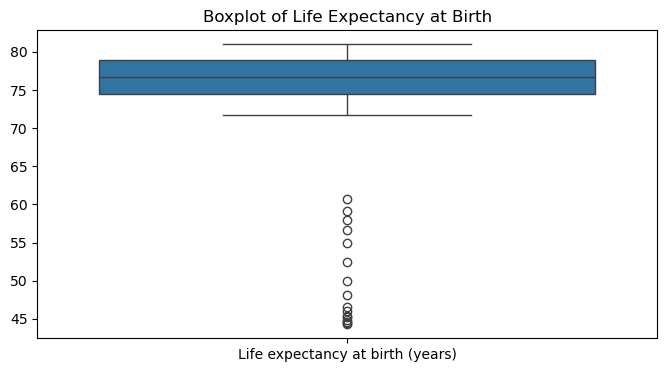

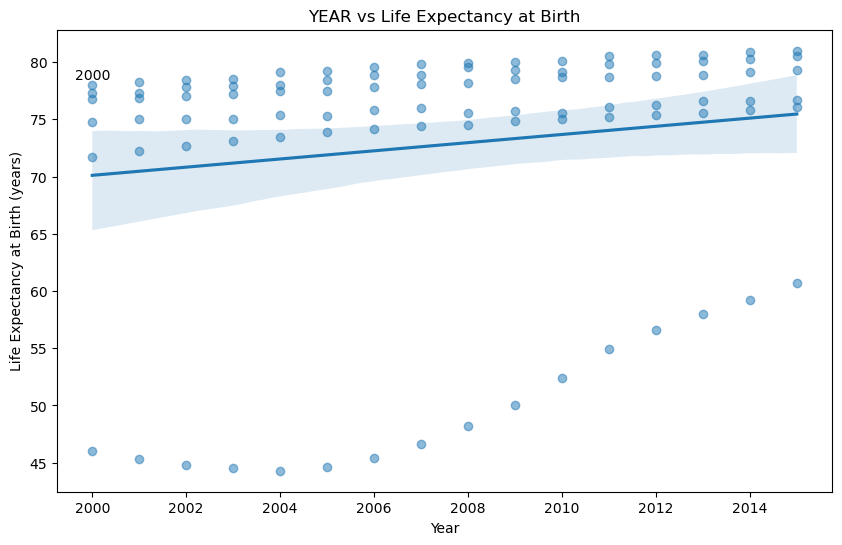

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'life_exp' is already defined and contains the required data

# Calculate correlation
correlation = life_exp[['Year', 'Life expectancy at birth (years)']].corr()
print("Correlation between year and life expectancy at birth:\n", correlation)

# Check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=life_exp[['Life expectancy at birth (years)']])
plt.title('Boxplot of Life Expectancy at Birth')
plt.show()

# Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=life_exp, x='Year', y='Life expectancy at birth (years)', scatter_kws={'alpha': 0.5})
plt.title('YEAR vs Life Expectancy at Birth')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')

# Annotate significant points (select fewer years to reduce clutter)
important_years = [1950, 2000, 2020]  # Example years for annotation
for year in important_years:
    data_point = life_exp[life_exp['Year'] == year]
    if not data_point.empty:
        plt.annotate(year, 
                     (data_point['Year'].values[0], data_point['Life expectancy at birth (years)'].values[0]),
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center')

plt.show()


## GDP VS LIFE EXPECTANCY

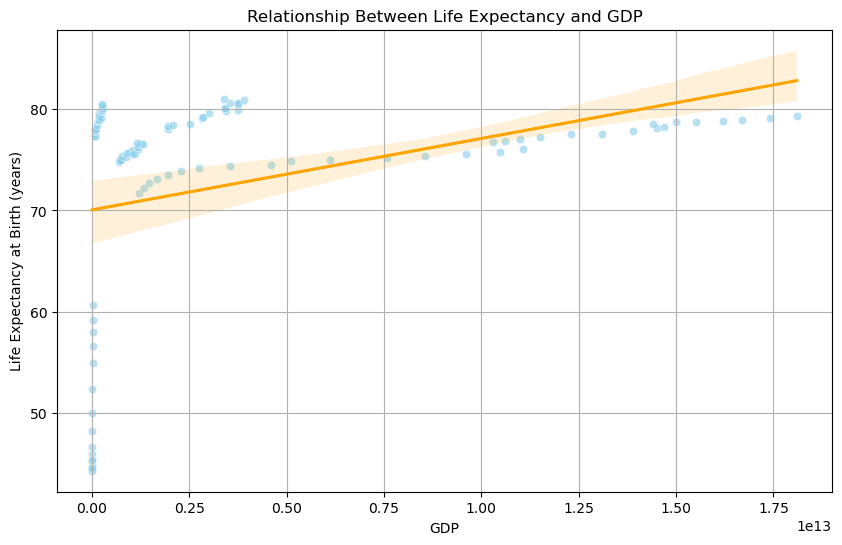

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'life_exp' DataFrame is defined and contains 'Life expectancy at birth (years)' and 'GDP'

# Set up the plot
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(data=life_exp, x='GDP', y='Life expectancy at birth (years)', color='skyblue', alpha=0.6)
sns.regplot(data=life_exp, x='GDP', y='Life expectancy at birth (years)', scatter=False, color='orange')

# Adding titles and labels
plt.title('Relationship Between Life Expectancy and GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy at Birth (years)')

plt.grid(True)
plt.show()


## MULTIVARIATE STATISTICS 

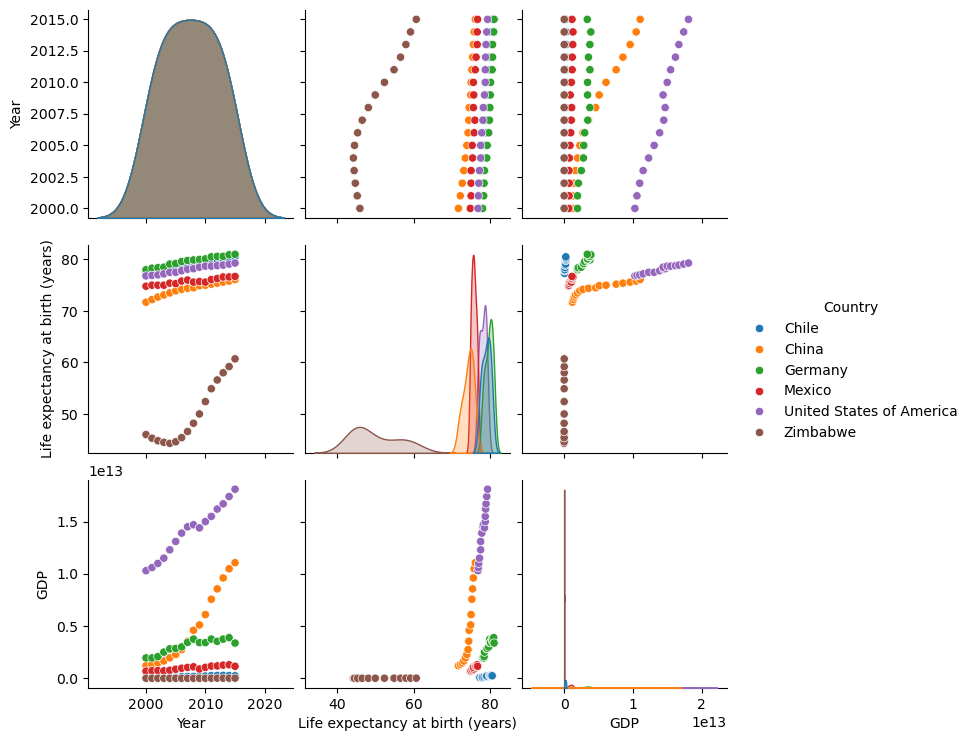

In [59]:
# lets see some  relationships
sns.pairplot(life_exp, hue='Country')
plt.show()
 

In [60]:
life_exp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


                                   OLS Regression Results                                   
Dep. Variable:     Life expectancy at birth (years)   R-squared:                       0.118
Model:                                          OLS   Adj. R-squared:                  0.108
Method:                               Least Squares   F-statistic:                     12.55
Date:                              Wed, 18 Sep 2024   Prob (F-statistic):           0.000619
Time:                                      20:39:13   Log-Likelihood:                -357.00
No. Observations:                                96   AIC:                             718.0
Df Residuals:                                    94   BIC:                             723.1
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

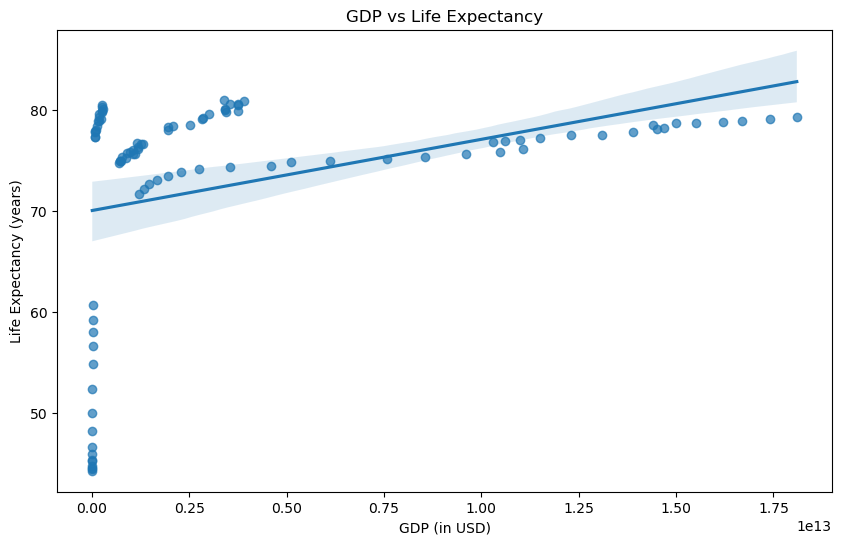

In [61]:
import statsmodels.api as sm
# Perform regression analysis
X = life_exp['GDP']
y = life_exp['Life expectancy at birth (years)']
X = sm.add_constant(X)  # Adds a constant term for the intercept
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=life_exp, x='GDP', y='Life expectancy at birth (years)', scatter_kws={'alpha': 0.7})
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP (in USD)')
plt.ylabel('Life Expectancy (years)')
plt.show()
